## RFM客户价值分类
数据为北美某超市的2015-2018 年的销售情况
本例中将通过两种方式进行模型建立
1. 使用定义的以均值作为分界线，划分维度。
2. 使用机器学习的K-mean 算法进行分类 

将两个方法的结果进行对比，仅供个人的数据分析的训练之用。

### 一. 均值分界

## 0.模块及数据导入

In [253]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('fivethirtyeight')
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [254]:
data = pd.read_csv('./North_American_Superstore.csv',sep=',', encoding = "gbk")
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


In [255]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9983 non-null   float64
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [256]:
data.rename(columns = lambda x : x.replace(' ',''),inplace = True)

## 1. Data preparing 数据预处理

# 1.1 Delect duplicated data 删除重复值

In [257]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   RowID         9994 non-null   int64  
 1   OrderID       9994 non-null   object 
 2   OrderDate     9994 non-null   object 
 3   ShipDate      9994 non-null   object 
 4   ShipMode      9994 non-null   object 
 5   CustomerID    9994 non-null   object 
 6   CustomerName  9994 non-null   object 
 7   Segment       9994 non-null   object 
 8   Country       9994 non-null   object 
 9   City          9994 non-null   object 
 10  State         9994 non-null   object 
 11  PostalCode    9983 non-null   float64
 12  Region        9994 non-null   object 
 13  ProductID     9994 non-null   object 
 14  Category      9994 non-null   object 
 15  Sub-Category  9994 non-null   object 
 16  ProductName   9994 non-null   object 
 17  Sales         9994 non-null   float64
 18  Quantity      9994 non-null 

# 1.2 Find abnormal vaule 寻找异常值 

In [258]:
data.loc[data['Sales']<=0].Sales.count()

0

In [259]:
data = data.loc[(data['Sales']>0)&(data['Quantity']>0)]
data.head()


,RowID,OrderID,OrderDate,ShipDate,ShipMode,CustomerID,CustomerName,Segment,Country,City,State,PostalCode,Region,ProductID,Category,Sub-Category,ProductName,Sales,Quantity,Discount,Profit
0,7981,CA-2015-103800,2015/1/3,2015/1/7,Standard Class,DP-13000,Darren Powers,Consumer,United States,Houston,Texas,77095.0,Central,OFF-PA-10000174,Office Supplies,Paper,"Message Book, Wirebound, Four 5 1/2"" X 4"" Form...",16.448,2,0.2,5.5512
1,740,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-LA-10003223,Office Supplies,Labels,Avery 508,11.784,3,0.2,4.2717
2,741,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-ST-10002743,Office Supplies,Storage,SAFCO Boltless Steel Shelving,272.736,3,0.2,-64.7748
3,742,CA-2015-112326,2015/1/4,2015/1/8,Standard Class,PO-19195,Phillina Ober,Home Office,United States,Naperville,Illinois,60540.0,Central,OFF-BI-10004094,Office Supplies,Binders,GBC Standard Plastic Binding Systems Combs,3.540,2,0.8,-5.4870
4,1760,CA-2015-141817,2015/1/5,2015/1/12,Standard Class,MB-18085,Mick Brown,Consumer,United States,Philadelphia,Pennsylvania,19143.0,East,OFF-AR-10003478,Office Supplies,Art,Avery Hi-Liter EverBold Pen Style Fluorescent ...,19.536,3,0.2,4.8840


## 1.3 Change the orderdate format to datetime 64 将日期改为datetime64 格式




In [260]:
data['OrderDate'] = pd.to_datetime(data['OrderDate'])
print('First date:',data['OrderDate'].min(), 'Last date:', data['OrderDate'].max())
data.info()

First date: 2015-01-03 00:00:00 Last date: 2018-12-30 00:00:00
<class 'pandas.core.frame.DataFrame'>
Int64Index: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         9994 non-null   int64         
 1   OrderID       9994 non-null   object        
 2   OrderDate     9994 non-null   datetime64[ns]
 3   ShipDate      9994 non-null   object        
 4   ShipMode      9994 non-null   object        
 5   CustomerID    9994 non-null   object        
 6   CustomerName  9994 non-null   object        
 7   Segment       9994 non-null   object        
 8   Country       9994 non-null   object        
 9   City          9994 non-null   object        
 10  State         9994 non-null   object        
 11  PostalCode    9983 non-null   float64       
 12  Region        9994 non-null   object        
 13  ProductID     9994 non-null   object        
 14  Category      9994 non-nu

## 2. Create the RFM model for estimate custumer values 创建RFM 客户价值分类模型


## 2.1 F (Frequency)  Times of different customers sales

In [261]:
dF=data.copy()

In [262]:
dF.drop_duplicates(subset=['OrderID'],keep='first',inplace=True)  #  for find the frequency by orderid that mean the customer consume one time
dF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5009 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   RowID         5009 non-null   int64         
 1   OrderID       5009 non-null   object        
 2   OrderDate     5009 non-null   datetime64[ns]
 3   ShipDate      5009 non-null   object        
 4   ShipMode      5009 non-null   object        
 5   CustomerID    5009 non-null   object        
 6   CustomerName  5009 non-null   object        
 7   Segment       5009 non-null   object        
 8   Country       5009 non-null   object        
 9   City          5009 non-null   object        
 10  State         5009 non-null   object        
 11  PostalCode    5003 non-null   float64       
 12  Region        5009 non-null   object        
 13  ProductID     5009 non-null   object        
 14  Category      5009 non-null   object        
 15  Sub-Category  5009 non-null   object  

In [263]:
fre = dF.groupby('CustomerID',as_index=False).OrderID.count().rename(columns = {'OrderID':'Frequency'})
fre.set_index('CustomerID',drop=True,inplace=True)
fre.head()

,Frequency
CustomerID,
AA-10315,5
AA-10375,9
AA-10480,4
AA-10645,6
AB-10015,3


## 2.2 R (rencency) M (Monetary)

In [264]:
# recency (the number of day that customer last cumsume ) 
# M sales and can show the profit.
df_group = data.groupby('CustomerID')
Odate = df_group.OrderDate.max()
df_rm = df_group.agg({'Sales':"sum",'Profit':'sum'}).rename(columns={'Sales':'Monetary'})
df_rm['Rencency'] = (pd.to_datetime('2019-01-01')-Odate).dt.days 
df_rm

,Monetary,Profit,Rencency
CustomerID,,,
AA-10315,5563.560,-362.8825,186
AA-10375,1056.390,277.3824,21
AA-10480,1790.512,435.8274,261
AA-10645,5086.935,857.8033,57
AB-10015,886.156,129.3465,417
...,...,...,...
XP-21865,2374.658,621.2300,45
YC-21895,5454.350,1305.6290,6
YS-21880,6720.444,1778.2923,11


## 2.3 redefine frequency

In [265]:
dyears =  df_group.agg({'OrderDate':(lambda df :df.dt.year.max()-df.dt.year.min()+1)}).rename(
    columns={'OrderDate':'DiffYears'}).DiffYears

fre.Frequency = fre.Frequency/dyears

In [266]:
fre.head()

,Frequency
CustomerID,
AA-10315,1.25
AA-10375,2.25
AA-10480,1.00
AA-10645,1.50
AB-10015,1.00


## 2.4 Concate to RFM dataframe 

In [267]:
RFM = df_rm.merge(fre, on='CustomerID')
RFM.head() 

,Monetary,Profit,Rencency,Frequency
CustomerID,,,,
AA-10315,5563.560,-362.8825,186,1.25
AA-10375,1056.390,277.3824,21,2.25
AA-10480,1790.512,435.8274,261,1.00
AA-10645,5086.935,857.8033,57,1.50
AB-10015,886.156,129.3465,417,1.00


## 2.5 Base on the RFM data to classcifly type of customer 

In [268]:
rm= RFM['Rencency'].median()
fm= RFM['Frequency'].median()
mm= RFM['Monetary'].median()
rm,fm,mm

(77.0, 1.75, 2256.394)

## 说明（Customer type note）：
重要价值客户(Best Customers)（111）： 最近消费时间近、消费频次和消费金额都很高，必须是VIP啊！

重要保持客户（Active Loyal Customers）（011）： 最近消费时间较远，但消费频次和金额都很高，说明这是个一段时间没来的忠诚客户，我们需要主动和他保持联系。

重要发展客户()（101）： 最近消费时间较近、消费金额高，但频次不高，忠诚度不高，很有潜力的用户，必须重点发展。

重要挽留客户（001）： 最近消费时间较远、消费频次不高，但消费金额高的用户，可能是将要流失或者已经要流失的用户，应当给予挽留措施。

In [273]:
def customer_type_func(frame): 
    customer_type_list = []
    for i in range(len(frame)):
        if frame.iloc[i,2]<=rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要价值客户')
        elif  frame.iloc[i,2]<=rm and frame.iloc[i,3]<=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要发展客户')
        elif  frame.iloc[i,2]>=rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要保持客户')
        elif  frame.iloc[i,2]>=rm and frame.iloc[i,3]<=fm and frame.iloc[i,0]>=mm:
            customer_type_list.append('重要挽留客户')
        elif  frame.iloc[i,2]<=rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]<=mm:
            customer_type_list.append('一般价值客户')
        elif  frame.iloc[i,2]<=rm and frame.iloc[i,3]<=fm and frame.iloc[i,0]<=mm:
            customer_type_list.append('一般发展客户')   
        elif  frame.iloc[i,2]>=rm and frame.iloc[i,3]>=fm and frame.iloc[i,0]<=mm:
            customer_type_list.append('一般保持客户')    
        elif  frame.iloc[i,2]>=rm and frame.iloc[i,3]<=fm and frame.iloc[i,0]<=mm:
            customer_type_list.append('一般挽留客户')    
        
    frame['CustomerType'] = customer_type_list

In [274]:
customer_type_func(RFM)

In [275]:
RFM.head()

,Monetary,Profit,Rencency,Frequency,CustomerType
CustomerID,,,,,
AA-10315,5563.560,-362.8825,186,1.25,重要挽留客户
AA-10375,1056.390,277.3824,21,2.25,一般价值客户
AA-10480,1790.512,435.8274,261,1.00,一般挽留客户
AA-10645,5086.935,857.8033,57,1.50,重要发展客户
AB-10015,886.156,129.3465,417,1.00,一般挽留客户


In [276]:
RFM.info()

<class 'pandas.core.frame.DataFrame'>
Index: 793 entries, AA-10315 to ZD-21925
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Monetary      793 non-null    float64
 1   Profit        793 non-null    float64
 2   Rencency      793 non-null    int64  
 3   Frequency     793 non-null    float64
 4   CustomerType  793 non-null    object 
dtypes: float64(3), int64(1), object(1)
memory usage: 37.2+ KB


In [277]:
all_cus = RFM.groupby('CustomerType').size().reset_index(name='num')
#all_cus = all_cus.sort_values(by='num' ,ascending=False)

all_cus

,CustomerType,num
0,一般价值客户,73
1,一般保持客户,70
2,一般发展客户,94
3,一般挽留客户,159
4,重要价值客户,179
5,重要保持客户,115
6,重要发展客户,51
7,重要挽留客户,52


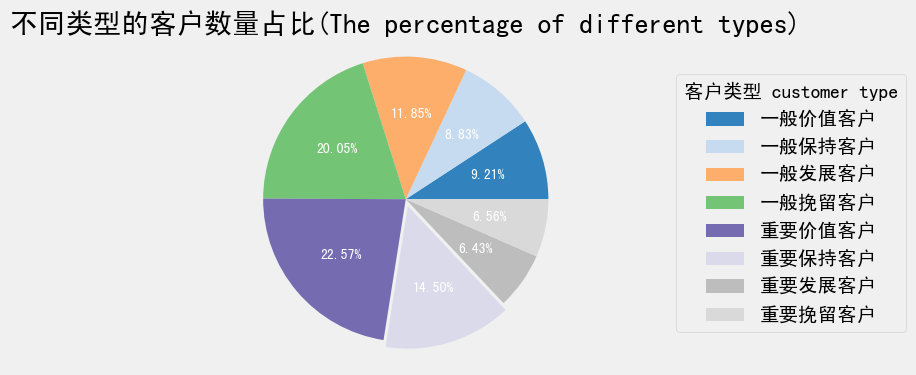

In [278]:
fig1 = plt.figure(1,figsize=(6,4),dpi=100)
ax1_1 = fig1.add_subplot(111)
labels=all_cus['CustomerType']
explode=[0,0,0,0,0,0.05,0,0]
cmap = plt.get_cmap("tab20c")
colors = cmap(np.arange(8)*3)
ax1_1.pie(all_cus['num'],explode=explode,textprops={'color':"w",'fontsize':10},shadow=False,autopct='%.2f%%',colors = colors)
ax1_1.axis('equal')
ax1_1.set_title('不同类型的客户数量占比(The percentage of different types)',fontsize=20)
ax1_1.legend(labels,
          title="客户类型 customer type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

## 2.6 盈利金额&销售金额  （Profit & Sales Amount）

In [279]:
Cusam = RFM.groupby('CustomerType').agg({'Profit':'sum','Monetary':'sum'})
Cusam

,Profit,Monetary
CustomerType,,
一般价值客户,13313.5491,107408.6872
一般保持客户,13808.7511,92214.0960
一般发展客户,8491.8539,98821.0863
一般挽留客户,10001.7831,157420.5274
重要价值客户,95770.4661,816862.0390
重要保持客户,85341.7552,559257.1580
重要发展客户,30303.5112,236080.1130
重要挽留客户,29365.3520,229137.1534


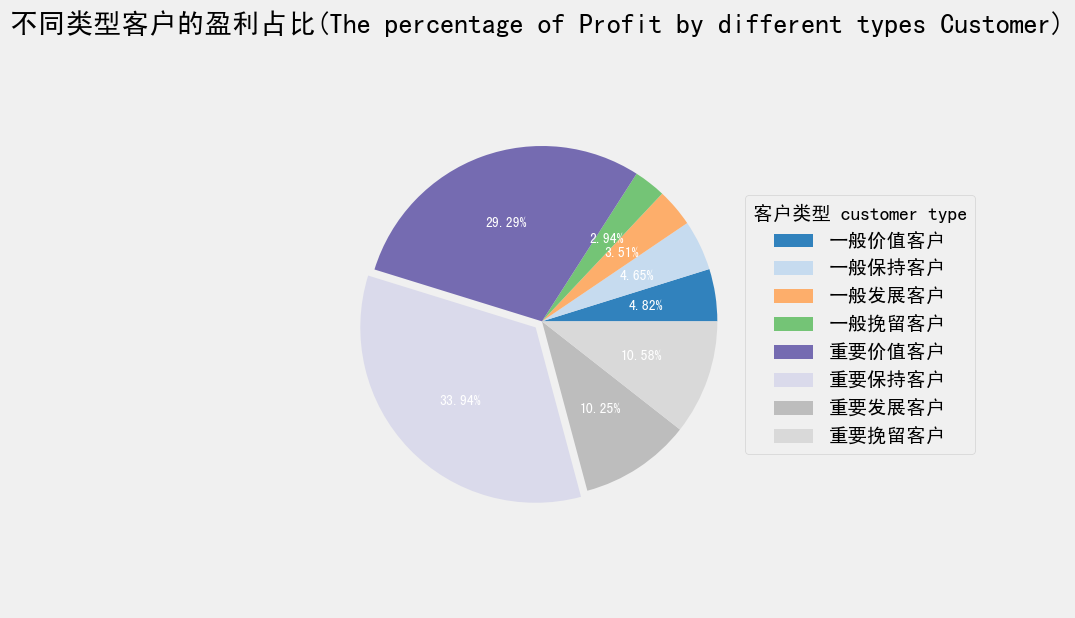

In [168]:
fig2 = plt.figure(1,figsize=(10,7),dpi=100)

ax2_1 = fig2.add_subplot(121)
labels=list(Cusam.index)
explode=[0,0,0,0,0,0.05,0,0]
ax2_1.pie(Cusam['Profit'],explode=explode,textprops={'color':"w",'fontsize':10},shadow=False,autopct='%.2f%%',colors = colors)
ax2_1.axis('equal')
ax2_1.set_title('不同类型客户的盈利占比(The percentage of Profit by different types Customer)',fontsize=20)
ax2_1.legend(labels,
          title="客户类型 customer type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))


结合'不同类型客户的盈利占比'和'不同类型的客户数量占比' 两图，可以很清楚发现一般客户的人数占大概50%但是其盈利能力相当低下大概15%，这也符合本例中模型的分类机制。由于本例中选择的分类都是对于总体而言消费能力高（大于均值的）的客户进行细分，在此先重点专注重要价值客户和重要保持客户，分别占据15%和22%的数量贡献了29%和33%的利润，其中主要的区别是消费的时间间距比较大。根据上图，建议将资源用于缩短重要保持客户的消费时间间距，如主动提示客户或者其他的刺激消费的营销手法； 而对于重要价值的客户，采取保持维护客户关系。我们还可以发现的是一般发展和一般挽留类别的客户占了很大的一部分，有可能是一次性客户或者刚好路过超市的客户，因此并不建议花费资源用于发展该类。至此，只是我们从盈利数据和客户数据作出的初步分析。

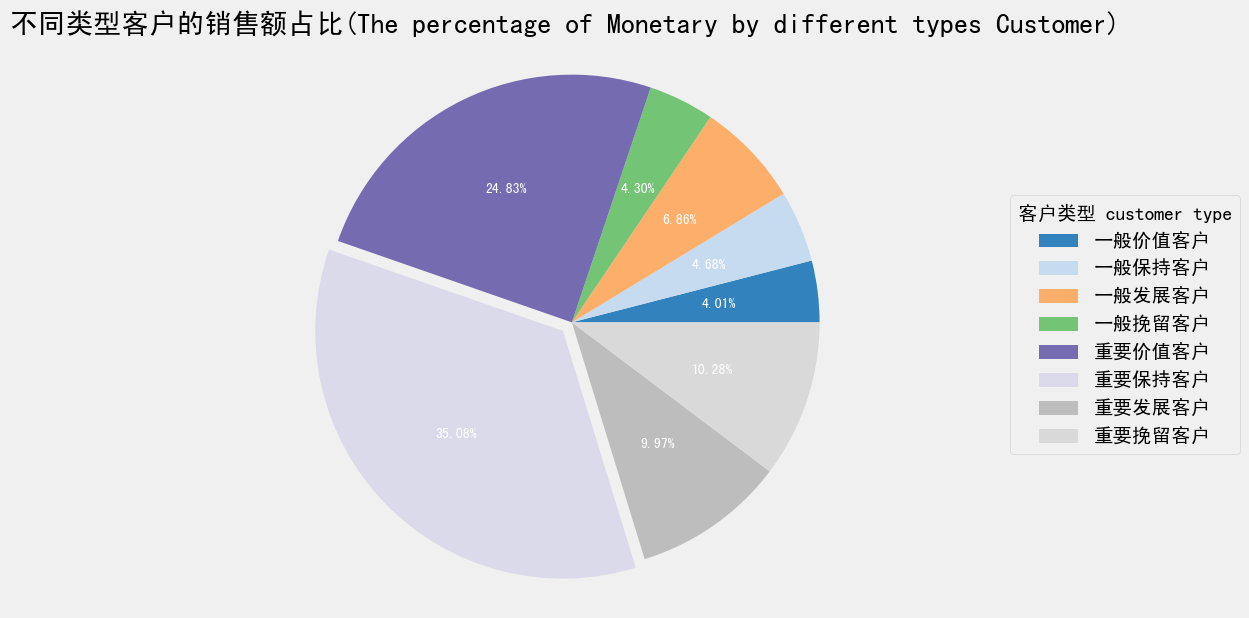

In [170]:
fig3 = plt.figure(1,figsize=(10,7),dpi=100)
ax2_2 = fig3.add_subplot(111)
labels=list(Cusam.index)
explode=[0,0,0,0,0,0.05,0,0]
ax2_2.pie(Cusam['Monetary'],explode=explode,textprops={'color':"w",'fontsize':10},shadow=False,autopct='%.2f%%',colors=colors)
ax2_2.axis('equal')
ax2_2.set_title('不同类型客户的销售额占比(The percentage of Monetary by different types Customer)',fontsize=20)
ax2_2.legend(labels,
          title="客户类型 customer type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

超市需要重点关注重要挽留客户和重要发展客户，两类客户数量分别都占有大概6%，但是创造的盈利都分别达到了10%。这充分的说明了他们的盈利能力，通过提示消费和其他手法提升他们的购买频率和购买时间的间距。但是由于公司的售卖物品属于办公型或者家具有一定的使用周期，客户也很难在短时间内在此购买，商家可以通过增添货物种类，以增加销售量。

## Combine with Category Classification 配合购买的种类进行分析  

In [187]:
catepro = pd.DataFrame(data.Category.value_counts())
catepro['profit'] = data.groupby(['Category']).Profit.sum()
catepro['sales']=data.groupby(['Category']).Sales.sum()
catepro['profitrate']=(catepro['profit']/catepro['sales'])
catepro

,Category,profit,sales,profitrate
Office Supplies,6026,122490.8008,719047.0320,0.170352
Furniture,2121,18451.2728,741999.7953,0.024867
Technology,1847,145454.9481,836154.0330,0.173957


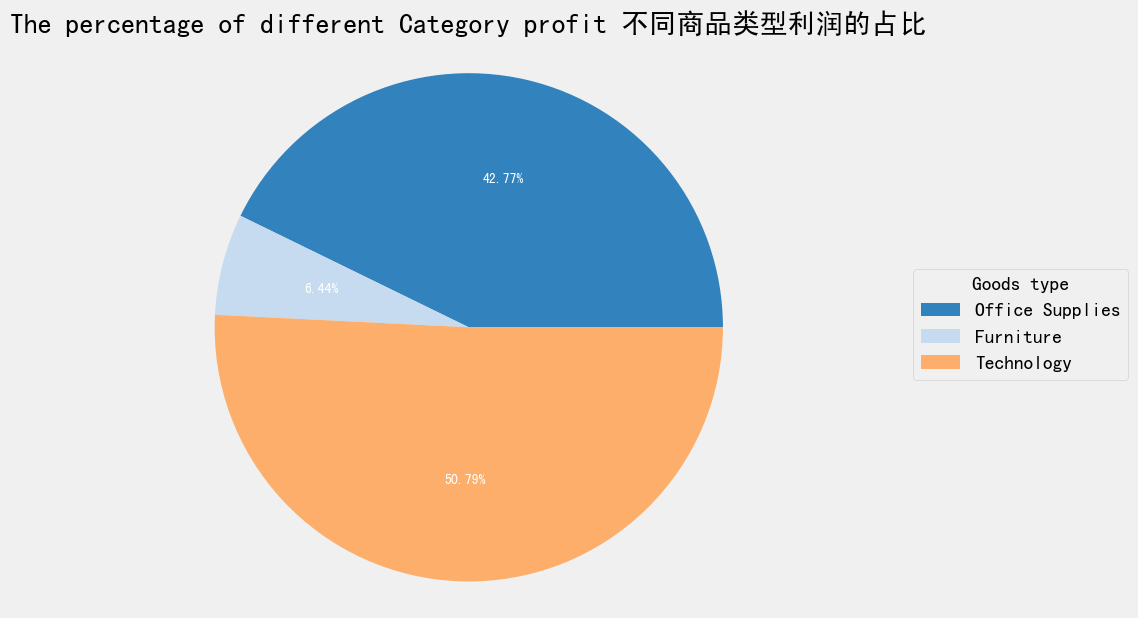

In [185]:
fig4 = plt.figure(1,figsize=(10,7),dpi=100)
ax3_2 = fig4.add_subplot(111)
labels=list(catepro.index)
explode=[0,0,0]
ax3_2.pie(catepro['profit'],explode=explode,textprops={'color':"w",'fontsize':10},shadow=False,autopct='%.2f%%',colors=colors)
ax3_2.axis('equal')
ax3_2.set_title('The percentage of different Category profit 不同商品类型利润的占比',fontsize=20)
ax3_2.legend(labels,
          title="Goods type",
          loc="center left",
          bbox_to_anchor=(1, 0, 0.5, 1))

由上图中Office Supplies的利润占超市很大的一部分，套用到实际的商业场景中，就是公司的采购者采购办公用品。该类用品的购买必然是有时间间隔的，并且一般选定了商店不会轻易改变，因此非常切合重要保持客户的形象。因此，对于该类客户的增长，最好的办法就是对该类客户提供稳定的折扣率，并且利用病毒性为超市宣传引入新的公司采购者，不需要投入过多的资源拉新等营销活动，属于忠诚度较高的客户。

# 由于本例中的数据时间跨度并不是很大，数据量不足，而且商品的性质决定了其售卖的周期。

### 二. K-mean

#### 1.为Kmeans 模型提供三个特征的数据集

In [217]:
k_rfm=RFM[['Monetary','Rencency','Frequency']]
k_rfm

,Monetary,Rencency,Frequency
CustomerID,,,
AA-10315,5563.560,186,1.250000
AA-10375,1056.390,21,2.250000
AA-10480,1790.512,261,1.000000
AA-10645,5086.935,57,1.500000
AB-10015,886.156,417,1.000000
...,...,...,...
XP-21865,2374.658,45,2.750000
YC-21895,5454.350,6,1.250000
YS-21880,6720.444,11,2.666667


#### 2.将数据集取对数，因为K-Means的聚类方式对数据的浮动比较敏感，取对数的使得数据的波动范围缩小。

In [198]:
logk_rfm = np.log(k_rfm+1)
logk_rfm

,Monetary,Rencency,Frequency
CustomerID,,,
AA-10315,8.624173,5.231109,0.810930
AA-10375,6.963559,3.091042,1.178655
AA-10480,7.490815,5.568345,0.693147
AA-10645,8.534627,4.060443,0.916291
AB-10015,6.788021,6.035481,0.693147
...,...,...,...
XP-21865,7.773030,3.828641,1.321756
YC-21895,8.604352,1.945910,0.810930
YS-21880,8.813058,2.484907,1.299283


#### 3. 将数据归一化

In [200]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(logk_rfm)
logk_rfm = ss.transform(logk_rfm)
logk_rfm

array([[ 1.01356744,  0.73109591, -0.84453934],
       [-0.56837678, -1.01977617,  0.72649931],
       [-0.06609872,  1.00700182, -1.34774639],
       ...,
       [ 1.19350428, -1.51567965,  1.24186091],
       [ 1.36256808, -0.24090041,  1.87260943],
       [-0.23849658,  0.80628402, -0.84453934]])

#### 4.通过循环，记录三种聚类指标在K值在 2-11 之间的最佳值，即数据的聚类中心的数量分类数目。

No handles with labels found to put in legend.


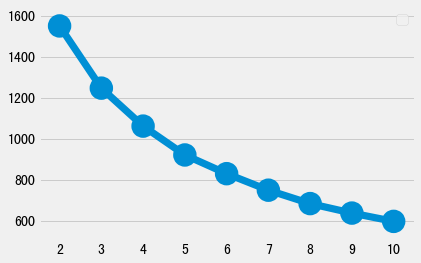

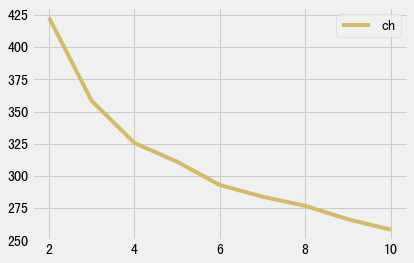

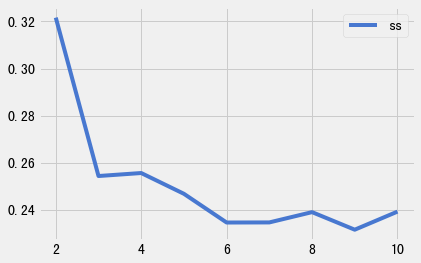

In [280]:
from sklearn.cluster import KMeans
from sklearn import metrics
sse={}
ch_score=[]
ss_score = []
for k in range(2,11):
    kmeans =KMeans(n_clusters=k , random_state= 99 ).fit(logk_rfm)
    cluster_lables = kmeans.labels_
    sse[k] = kmeans.inertia_
    pred = kmeans.fit_predict(logk_rfm)
    ch = metrics.calinski_harabaz_score(logk_rfm,pred)
    ss = metrics.silhouette_score(logk_rfm,pred)
    ch_score.append(ch)
    ss_score.append(ss)


sns.pointplot(x=list(sse.keys()),y=list(sse.values()))
plt.legend()

fig = plt.figure()
plt.plot(list(range(2,11)),ch_score,label='ch',c='y')
plt.legend()

fig = plt.figure()
plt.plot(list(range(2,11)),ss_score,label='ss',c='b')
plt.legend()

##### 综合inertia， Calinski-Harabaz Index，Silhouette Coefficient 轮廓系数，可以发现在K=3 的位置为最佳。
Silhouette Coefficient 轮廓系数分数越高，分辨的能力越高。

Calinski-Harabaz Index 分数越高，聚类的效果越好。

inertia  该值越小越好，值越小证明样本在类间的分布越集中，即类内的距离越小。

#### 5. 计算3类客户分的人数

In [219]:
kmeans = KMeans(n_clusters=3,max_iter=1000,random_state = 123)
kmeans.fit_predict(logk_rfm)
labels = pd.Series(kmeans.labels_)
centers = pd.DataFrame(kmeans.cluster_centers_)
result1 = pd.concat([centers,labels.value_counts().sort_index(ascending=True)],axis=1) # 将聚类中心和聚类个数拼接在一起
result1.columns = list(k_rfm.columns[0:]) + ['counts']
print(result1)

   Monetary  Rencency  Frequency  counts
0 -1.026329  0.428368  -1.092354     224
1  0.395841  0.637254   0.317678     282
2  0.412150 -0.966075   0.541204     287


#### 6. 三类客户的RFM均值，其对应的是RFM 模型中的客户类型 

In [236]:
labels.index = k_rfm.index
result = pd.concat([k_rfm,labels],axis=1)   # 将原始数据和聚类结果拼接在一起
result.columns = list(k_rfm.columns)+['label']  # 修改列名
pd.options.display.max_columns = None  # 设定展示所有的列
print(result.groupby(['label']).agg('mean')) # 分组计算各指标的均值
s=result.groupby(['label']).agg('mean')

          Monetary    Rencency  Frequency
label                                    
0       968.773847  217.075893   1.141741
1      3664.791828  217.145390   2.002660
2      3647.122729   28.282230   2.165215


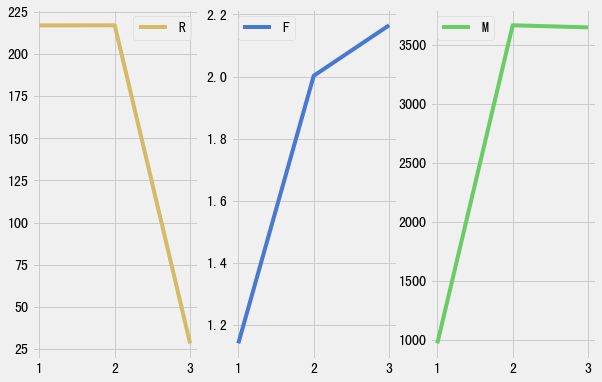

In [244]:

fig = plt.figure(figsize=(9,6))
ax1= fig.add_subplot(131)
ax1.plot(list(range(1,4)),s.Rencency,c='y',label='R')

plt.legend()
ax2= fig.add_subplot(132)
ax2.plot(list(range(1,4)),s.Frequency,c='b',label='F')

plt.legend()
ax3= fig.add_subplot(133)
ax3.plot(list(range(1,4)),s.Monetary,c='g',label='M')

plt.legend()
plt.show()


### 聚类结果
1. R:1, F:0, M:0 R值最大，其余两项FM都是最低值： 在RFM模型中对应的类型就是 一般挽留客户 说明距离购买的时间很长而且频率不高，消费金额不高。

2. R:1, F:0, M:1 R值最大，F最小，M值最大 ，对应的就是重要挽留客户 购买的时间间距比较长，消费金额很高。 考虑到办公用品的分类，采购员的假设比较成立。

3. R:0, F:1, M:1 R最小，F和M最大，说明最近刚消费过，且近半年消费频次和消费金额都非常高，属于高忠诚度，高活跃和高付费能力的用户，是最需要重点呵护的用户，建议安排专员一对一服务          